The Goal of this Project is to show what age group has more time or can find more time to enjoy themselves with video games!
We are using two different sets of data including a survey conducted between Men and Women of varying ages to see how much time and when they sit down to play games, and a grouping of sales data for us to see what types of games were sold. 

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import random
import sqlite3


This is setting up a data frame for a gaming survey conducted amongst men and women. 

In [78]:
Original_gaming_survey = pd.read_csv('Updated_Gaming_Survey_Responses(Sheet1).csv')
Original_gaming_survey

,Timestamp,Age,Gender,Location,How often do you play video games?,How many hours do you typically spend gaming in a week?,Which device do you play games on the most?(Check all that apply),What genres of video games do you play? (Check all that apply),What is your favorite game?,How do you discover new games? (Check all that apply),...,Why do you play video games? (Check all that apply),How often do you play video games?,How many hours do you typically spend gaming in a week?,Which device do you play games on the most?(Check all that apply),What genres of video games do you play? (Check all that apply),What is your favorite game?,How do you discover new games? (Check all that apply),Do you prefer single-player or multiplayer games?,"How much do you spend on gaming monthly (including in-game purchases, new games, etc.)?",Why do you play video games? (Check all that apply)
0,2024-10-24 13:09:27,18,Male,Bangalore,Daily,10-20 hours,Mobile,Sports,FC MOBILE,"Social Media, Gaming Forums",...,"For fun/entertainment, To relieve stress",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-10-24 13:09:34,19,Male,"Hell road , Bangalore",Rarely/Never,0,Mobile,"Puzzle/Strategy, Simulation (e.g., The Sims)",Wukong,Social Media,...,To improve skills/competition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-10-24 13:23:13,19,Male,Bangalore,Rarely/Never,More than 20 hours,"Console (PlayStation, Xbox, etc.)",First-Person Shooter (FPS),Call of duty,Gaming Forums,...,For fun/entertainment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-10-24 13:30:42,18,Female,Banglore,Rarely/Never,Less than 5 hours,Mobile,Puzzle/Strategy,Subway,Social Media,...,For fun/entertainment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-10-24 13:32:27,18,Female,"Banglore, Karnataka",Daily,Less than 5 hours,"PC, Mobile","Action/Adventure, First-Person Shooter (FPS), ...",Solo leveling arise,Friends/Family Recommendations,...,"For fun/entertainment, To relieve stress, To s...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2024-10-25 16:55:00,19,Male,Florida,Rarely/Never,5-10 hours,PC,Puzzle/Strategy,Subway,Social Media,...,"To socialize, For fun/entertainment",Daily,Less than 5 hours,All,Role-playing,Minecraft,Gaming Forums,Multiplayer,?100-500,For the story/experience
496,2024-10-25 16:56:00,16,Female,Florida,Daily,10-20 hours,"Console (PlayStation, Xbox, etc.)","Action/Adventure, First-Person Shooter (FPS), ...",Solo leveling arise,Friends/Family Recommendations,...,To relieve stress,Weekly,5-10 hours,"Console (PlayStation, Xbox, etc.)",Simulation,Overwatch,Social Media,Multiplayer,More than ?1000,For the story/experience
497,2024-10-25 16:57:00,30,Male,Ohio,Rarely/Never,More than 20 hours,"Console (PlayStation, Xbox, etc.)",Sports,Efootball,Social Media,...,"To socialize, To improve skills/competition, F...",Daily,More than 20 hours,"Console (PlayStation, Xbox, etc.)",Casual,Genshin Impact,Gaming Forums,Multiplayer,Less than ?100,For the story/experience
498,2024-10-25 16:58:00,19,Male,Ohio,Daily,More than 20 hours,PC,"Action/Adventure, First-Person Shooter (FPS), ...",Call of duty,"Social Media, Gaming Forums, Game Reviews/Blog...",...,"To improve skills/competition, To socialize",Rarely/Never,5-10 hours,"PC, Mobile",Action/Adventure,Among Us,Friends/Family Recommendations,Single-player,?100-500,For fun/entertainment


This is sales data regarding highest grossing games and genres.

In [79]:
original_sales_data = pd.read_csv('Video Game Sales 1978 - 2024 export 2025-07-15 22-06-38.csv')
original_sales_data

,Rank,Name,Platform,All_Platforms,All_Games,Publisher,Developer,Critic_Score,User_Score,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales,Year,Genre
0,1,Tetris,Series,NaN,Tetris (1984)|Tetris (1989)|Welltris|Hatris|Tw...,The Tetris Company,Alexey Pajitnov,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1988.0,Puzzle
1,2,Pokemon,Series,NaN,Pokemon Red & Green (Japan-only) & Blue|Pokemo...,Nintendo,Game Freak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998.0,Role-Playing
2,3,Call of Duty,Series,NaN,Call of Duty|Call of Duty 2|Call of Duty 3|Cal...,Activision,Infinity Ward,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.0,Shooter
3,4,Grand Theft Auto,Series,NaN,Grand Theft Auto|Grand Theft Auto: London 1969...,Rockstar Games,Rockstar North,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998.0,Action-Adventure
4,5,Super Mario,Series,NaN,Mario Bros.|Super Mario Bros.|Super Mario Bros...,Nintendo,Nintendo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1983.0,Platform
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63922,63923,Zombieland: Double Tap - Road Trip,PC,NaN,NaN,GameMill Entertainment,High Voltage Software,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.0,Shooter
63923,63924,Zombillie,NS,NaN,NaN,Forever Entertainment S.A.,Forever Entertainment S.A.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,Puzzle
63924,63925,Zone of the Enders: The 2nd Runner MARS,PC,NaN,NaN,Konami,Cygames,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,Simulation
63925,63926,Zoo Tycoon: Ultimate Animal Collection,XOne,NaN,NaN,Microsoft Studios,Frontier Developments,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,Simulation


In [80]:
Original_gaming_survey_cleaned = Original_gaming_survey.dropna()
Original_gaming_survey_cleaned

,Timestamp,Age,Gender,Location,How often do you play video games?,How many hours do you typically spend gaming in a week?,Which device do you play games on the most?(Check all that apply),What genres of video games do you play? (Check all that apply),What is your favorite game?,How do you discover new games? (Check all that apply),...,Why do you play video games? (Check all that apply),How often do you play video games?,How many hours do you typically spend gaming in a week?,Which device do you play games on the most?(Check all that apply),What genres of video games do you play? (Check all that apply),What is your favorite game?,How do you discover new games? (Check all that apply),Do you prefer single-player or multiplayer games?,"How much do you spend on gaming monthly (including in-game purchases, new games, etc.)?",Why do you play video games? (Check all that apply)
200,2024-10-25 12:00:00,26,Female,Florida,Daily,10-20 hours,Mobile,Sports,FC MOBILE,"Social Media, Gaming Forums",...,"For fun/entertainment, To relieve stress",Daily,5-10 hours,"PC, Console",Simulation,Genshin Impact,Friends/Family Recommendations,Single-player,?500-1000,For fun/entertainment
201,2024-10-25 12:01:00,17,Male,London,Rarely/Never,0,Mobile,"Puzzle/Strategy, Simulation (e.g., The Sims)",Wukong,Social Media,...,To improve skills/competition,Daily,Less than 5 hours,"PC, Mobile",First-Person Shooter (FPS),Genshin Impact,Gaming Forums,Multiplayer,?500-1000,To socialize
202,2024-10-25 12:02:00,18,Male,Ohio,Rarely/Never,More than 20 hours,"Console (PlayStation, Xbox, etc.)",First-Person Shooter (FPS),Call of duty,Gaming Forums,...,For fun/entertainment,Rarely/Never,10-20 hours,All,Puzzle/Strategy,League of Legends,Friends/Family Recommendations,Single-player,?500-1000,To socialize
203,2024-10-25 12:03:00,18,Male,Florida,Rarely/Never,Less than 5 hours,Mobile,Puzzle/Strategy,Subway,Social Media,...,For fun/entertainment,Weekly,Less than 5 hours,"Console (PlayStation, Xbox, etc.)",Action/Adventure,FIFA 2024,Gaming Forums,Both,Less than ?100,For the story/experience
204,2024-10-25 12:04:00,20,Female,London,Daily,Less than 5 hours,"PC, Mobile","Action/Adventure, First-Person Shooter (FPS), ...",Solo leveling arise,Friends/Family Recommendations,...,"For fun/entertainment, To relieve stress, To s...",Weekly,More than 20 hours,"PC, Mobile",Casual,Overwatch,Social Media,Both,?100-500,To socialize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2024-10-25 16:55:00,19,Male,Florida,Rarely/Never,5-10 hours,PC,Puzzle/Strategy,Subway,Social Media,...,"To socialize, For fun/entertainment",Daily,Less than 5 hours,All,Role-playing,Minecraft,Gaming Forums,Multiplayer,?100-500,For the story/experience
496,2024-10-25 16:56:00,16,Female,Florida,Daily,10-20 hours,"Console (PlayStation, Xbox, etc.)","Action/Adventure, First-Person Shooter (FPS), ...",Solo leveling arise,Friends/Family Recommendations,...,To relieve stress,Weekly,5-10 hours,"Console (PlayStation, Xbox, etc.)",Simulation,Overwatch,Social Media,Multiplayer,More than ?1000,For the story/experience
497,2024-10-25 16:57:00,30,Male,Ohio,Rarely/Never,More than 20 hours,"Console (PlayStation, Xbox, etc.)",Sports,Efootball,Social Media,...,"To socialize, To improve skills/competition, F...",Daily,More than 20 hours,"Console (PlayStation, Xbox, etc.)",Casual,Genshin Impact,Gaming Forums,Multiplayer,Less than ?100,For the story/experience
498,2024-10-25 16:58:00,19,Male,Ohio,Daily,More than 20 hours,PC,"Action/Adventure, First-Person Shooter (FPS), ...",Call of duty,"Social Media, Gaming Forums, Game Reviews/Blog...",...,"To improve skills/competition, To socialize",Rarely/Never,5-10 hours,"PC, Mobile",Action/Adventure,Among Us,Friends/Family Recommendations,Single-player,?100-500,For fun/entertainment


In [81]:
original_sales_data_cleaned = original_sales_data.dropna(axis=1)
original_sales_data_cleaned

,Rank,Name,Platform,Publisher,Developer,Genre
0,1,Tetris,Series,The Tetris Company,Alexey Pajitnov,Puzzle
1,2,Pokemon,Series,Nintendo,Game Freak,Role-Playing
2,3,Call of Duty,Series,Activision,Infinity Ward,Shooter
3,4,Grand Theft Auto,Series,Rockstar Games,Rockstar North,Action-Adventure
4,5,Super Mario,Series,Nintendo,Nintendo,Platform
...,...,...,...,...,...,...
63922,63923,Zombieland: Double Tap - Road Trip,PC,GameMill Entertainment,High Voltage Software,Shooter
63923,63924,Zombillie,NS,Forever Entertainment S.A.,Forever Entertainment S.A.,Puzzle
63924,63925,Zone of the Enders: The 2nd Runner MARS,PC,Konami,Cygames,Simulation
63925,63926,Zoo Tycoon: Ultimate Animal Collection,XOne,Microsoft Studios,Frontier Developments,Simulation


Set up Databases in an Sqlite3 set up and created tables for my datasets! 

In [82]:
conn = sqlite3.connect('Original_gaming_survey_cleaned.db')
cur = conn.cursor()
cur.execute

<function Cursor.execute(sql, parameters=(), /)>

In [83]:
Original_gaming_survey_cleaned.to_sql('Age', conn, if_exists='replace')

300

In [84]:
conn = sqlite3.connect('original_sales_data_cleaned.db')
curr = conn.cursor
cur.execute

<function Cursor.execute(sql, parameters=(), /)>

In [85]:
original_sales_data_cleaned.to_sql('Sales', conn, if_exists='replace')

63927

Set up Keys for each of the two data sets for future use when pulling data back down from the SQLite database.

In [86]:
df = pd.read_sql('SELECT Age FROM Age', conn)
print(df)

     Age
0     26
1     17
2     18
3     18
4     20
..   ...
295   19
296   16
297   30
298   19
299   19

[300 rows x 1 columns]


In [87]:
df2 = pd.read_sql('SELECT Gender FROM Age',conn)
print(df2)

     Gender
0    Female
1      Male
2      Male
3      Male
4    Female
..      ...
295    Male
296  Female
297    Male
298    Male
299  Female

[300 rows x 1 columns]


Setting up a bar graph pulling data down from the SQLite database and showing ages and Distribution of participants amonst each age range. This showed us that we had a pretty varied group of people surveyed allowing us to see as we grow from teen to adult how prevalent the hobby of gaming is. 

C:\Users\zachy\AppData\Local\Temp\ipykernel_24512\577498752.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Gaming Survey participants by age')


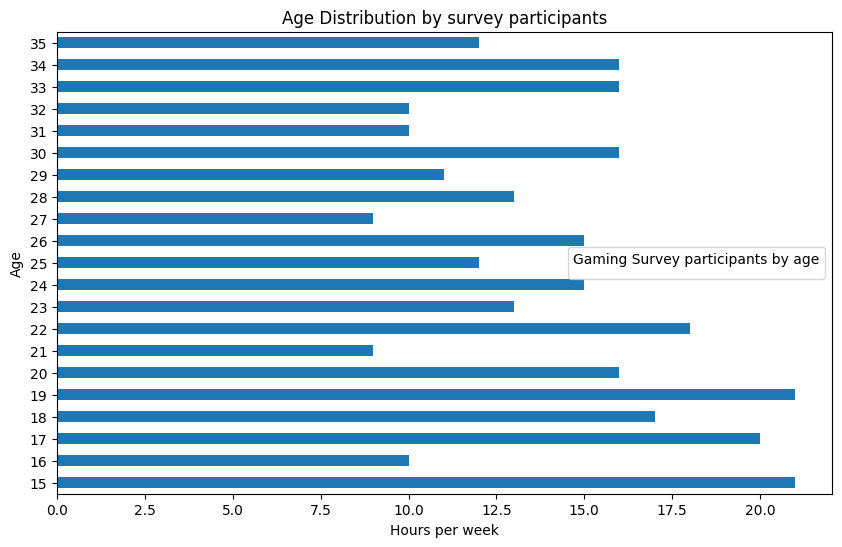

In [109]:
grouped = df.groupby(['Age']).size()
grouped.plot(kind='barh', figsize=(10, 6))
plt.title('Age Distribution by survey participants')
plt.xlabel('Hours per week')
plt.ylabel('Age')
plt.legend(title='Gaming Survey participants by age')
plt.show()

I had to use a cross method in order to merge the two sets of data since they did not share any like columns. This creates a full array of data for us to play around with. 

In [89]:
final_merged_data = pd.merge(Original_gaming_survey_cleaned, original_sales_data_cleaned, how='cross')
print(final_merged_data)

                    Timestamp  Age  Gender Location  \
0         2024-10-25 12:00:00   26  Female  Florida   
1         2024-10-25 12:00:00   26  Female  Florida   
2         2024-10-25 12:00:00   26  Female  Florida   
3         2024-10-25 12:00:00   26  Female  Florida   
4         2024-10-25 12:00:00   26  Female  Florida   
...                       ...  ...     ...      ...   
19178095  2024-10-25 16:59:00   19  Female  Toronto   
19178096  2024-10-25 16:59:00   19  Female  Toronto   
19178097  2024-10-25 16:59:00   19  Female  Toronto   
19178098  2024-10-25 16:59:00   19  Female  Toronto   
19178099  2024-10-25 16:59:00   19  Female  Toronto   

           How often do you play video games?    \
0                                         Daily   
1                                         Daily   
2                                         Daily   
3                                         Daily   
4                                         Daily   
...                              

Setting up Query for pulling list of only male and only female players data.

In [90]:
male_player = final_merged_data.query("Gender == 'Male'")
female_player = final_merged_data.query("Gender == 'Female'")
print(male_player)


                    Timestamp  Age Gender Location  \
63927     2024-10-25 12:01:00   17   Male   London   
63928     2024-10-25 12:01:00   17   Male   London   
63929     2024-10-25 12:01:00   17   Male   London   
63930     2024-10-25 12:01:00   17   Male   London   
63931     2024-10-25 12:01:00   17   Male   London   
...                       ...  ...    ...      ...   
19114168  2024-10-25 16:58:00   19   Male     Ohio   
19114169  2024-10-25 16:58:00   19   Male     Ohio   
19114170  2024-10-25 16:58:00   19   Male     Ohio   
19114171  2024-10-25 16:58:00   19   Male     Ohio   
19114172  2024-10-25 16:58:00   19   Male     Ohio   

           How often do you play video games?    \
63927                              Rarely/Never   
63928                              Rarely/Never   
63929                              Rarely/Never   
63930                              Rarely/Never   
63931                              Rarely/Never   
...                                         .

Cleaning up the Female data.

In [91]:
female_player = final_merged_data.query("Gender == 'Female'")
print(female_player)

                    Timestamp  Age  Gender Location  \
0         2024-10-25 12:00:00   26  Female  Florida   
1         2024-10-25 12:00:00   26  Female  Florida   
2         2024-10-25 12:00:00   26  Female  Florida   
3         2024-10-25 12:00:00   26  Female  Florida   
4         2024-10-25 12:00:00   26  Female  Florida   
...                       ...  ...     ...      ...   
19178095  2024-10-25 16:59:00   19  Female  Toronto   
19178096  2024-10-25 16:59:00   19  Female  Toronto   
19178097  2024-10-25 16:59:00   19  Female  Toronto   
19178098  2024-10-25 16:59:00   19  Female  Toronto   
19178099  2024-10-25 16:59:00   19  Female  Toronto   

           How often do you play video games?    \
0                                         Daily   
1                                         Daily   
2                                         Daily   
3                                         Daily   
4                                         Daily   
...                              

Cleaning up the Male data.

In [92]:
Male_age = final_merged_data.query("Age < 40 and Gender == 'Male'")
print(Male_age)

                    Timestamp  Age Gender Location  \
63927     2024-10-25 12:01:00   17   Male   London   
63928     2024-10-25 12:01:00   17   Male   London   
63929     2024-10-25 12:01:00   17   Male   London   
63930     2024-10-25 12:01:00   17   Male   London   
63931     2024-10-25 12:01:00   17   Male   London   
...                       ...  ...    ...      ...   
19114168  2024-10-25 16:58:00   19   Male     Ohio   
19114169  2024-10-25 16:58:00   19   Male     Ohio   
19114170  2024-10-25 16:58:00   19   Male     Ohio   
19114171  2024-10-25 16:58:00   19   Male     Ohio   
19114172  2024-10-25 16:58:00   19   Male     Ohio   

           How often do you play video games?    \
63927                              Rarely/Never   
63928                              Rarely/Never   
63929                              Rarely/Never   
63930                              Rarely/Never   
63931                              Rarely/Never   
...                                         .

In [93]:
Female_age = final_merged_data.query("Age < 40 and Gender == 'Female'")
print(Female_age)

                    Timestamp  Age  Gender Location  \
0         2024-10-25 12:00:00   26  Female  Florida   
1         2024-10-25 12:00:00   26  Female  Florida   
2         2024-10-25 12:00:00   26  Female  Florida   
3         2024-10-25 12:00:00   26  Female  Florida   
4         2024-10-25 12:00:00   26  Female  Florida   
...                       ...  ...     ...      ...   
19178095  2024-10-25 16:59:00   19  Female  Toronto   
19178096  2024-10-25 16:59:00   19  Female  Toronto   
19178097  2024-10-25 16:59:00   19  Female  Toronto   
19178098  2024-10-25 16:59:00   19  Female  Toronto   
19178099  2024-10-25 16:59:00   19  Female  Toronto   

           How often do you play video games?    \
0                                         Daily   
1                                         Daily   
2                                         Daily   
3                                         Daily   
4                                         Daily   
...                              

This was a first attempt at pulling a favorite genre. While the goal is to pull them by age to see how things change over time, this line of code just shows that overall the highest played genre is Simluation Games.

In [94]:
Common_game = Original_gaming_survey_cleaned['What genres of video games do you play? (Check all that apply)'].value_counts().idxmax()

print(Common_game)

Simulation


In [95]:
sorted_survey = Original_gaming_survey_cleaned.sort_values(by='Age')
Favorite_genre_by_age = sorted_survey['What genres of video games do you play? (Check all that apply)'].mode()

print (Favorite_genre_by_age)

0    Action/Adventure
1          Simulation
Name: What genres of video games do you play? (Check all that apply), dtype: object


Pulled the data of survey participants to see the actual number of people per age that joined and participated in this survey.

In [96]:
sorted_survey['Age'].value_counts()

Age
15    21
19    21
17    20
22    18
18    17
34    16
20    16
33    16
30    16
24    15
26    15
28    13
23    13
25    12
35    12
29    11
16    10
31    10
32    10
27     9
21     9
Name: count, dtype: int64

The next several cells are just isolating particular variables for the data to be used in other aspects of the project. We pulled certain columns for us to dive a bit deeper into. 

In [97]:
isolated_frequency = sorted_survey['  How often do you play video games?  ']

print(isolated_frequency)

472             Rarely/Never
239    A few times in a week
481       A few times a week
479                    Daily
260             Rarely/Never
               ...          
369                    Daily
403             Rarely/Never
484                    Daily
247                    Daily
254                    Daily
Name:   How often do you play video games?  , Length: 300, dtype: object


In [98]:
isolated_age = sorted_survey['Age']
print(isolated_age)

472    15
239    15
481    15
479    15
260    15
       ..
369    35
403    35
484    35
247    35
254    35
Name: Age, Length: 300, dtype: int64


In [99]:
isolate_device = sorted_survey['Which device do you play games on the most?(Check all that apply)']
print(isolate_device)

472                                   PC
239                      Mobile, Console
481                               Mobile
479                                  All
260                                   PC
                     ...                
369    Console (PlayStation, Xbox, etc.)
403                           PC, Mobile
484                           PC, Mobile
247                               Mobile
254                           PC, Mobile
Name: Which device do you play games on the most?(Check all that apply), Length: 300, dtype: object


In [100]:
isolated_genre = sorted_survey['What genres of video games do you play? (Check all that apply)']
print(isolated_genre)

472                        Horror
239                  Role-playing
481                        Sports
479    First-Person Shooter (FPS)
260              Action/Adventure
                  ...            
369               Puzzle/Strategy
403    First-Person Shooter (FPS)
484              Action/Adventure
247                        Casual
254                        Horror
Name: What genres of video games do you play? (Check all that apply), Length: 300, dtype: object


In [101]:
isolated_hours = sorted_survey['How many hours do you typically spend gaming in a week?']
print(isolated_hours)

472            5-10 hours
239    More than 20 hours
481    More than 20 hours
479     Less than 5 hours
260     Less than 5 hours
              ...        
369            5-10 hours
403     Less than 5 hours
484            5-10 hours
247     Less than 5 hours
254     Less than 5 hours
Name: How many hours do you typically spend gaming in a week?, Length: 300, dtype: object


In [102]:
isolated_gaming_cost = sorted_survey['How much do you spend on gaming monthly (including in-game purchases, new games, etc.)?']
print(isolated_gaming_cost)

472           ?100-500
239           ?100-500
481    More than ?1000
479     Less than ?100
260    More than ?1000
            ...       
369    More than ?1000
403     Less than ?100
484          ?500-1000
247          ?500-1000
254    More than ?1000
Name: How much do you spend on gaming monthly (including in-game purchases, new games, etc.)?, Length: 300, dtype: object


This next cell shows us the average expendeture amongst the survey participants. We found that on average people spend between 100-500 dollars a month on video games. 

In [103]:
average_gaming_cost = isolated_gaming_cost.mode()
print(average_gaming_cost)

0    ?100-500
Name: How much do you spend on gaming monthly (including in-game purchases, new games, etc.)?, dtype: object


In [105]:
age_counts = Counter(sorted_survey['Age'])
print(age_counts)

Counter({15: 21, 19: 21, 17: 20, 22: 18, 18: 17, 20: 16, 30: 16, 33: 16, 34: 16, 24: 15, 26: 15, 23: 13, 28: 13, 25: 12, 35: 12, 29: 11, 16: 10, 31: 10, 32: 10, 21: 9, 27: 9})


The next few cells were pulling the age and gender data and then grouping them together by gender so we can see the ages of games and what gender they are. We have a fairly evenly split set of data amongst both men and women. 

In [106]:
isolated_sorted_age = Original_gaming_survey_cleaned[['Age', 'Gender']].sort_values(by='Gender')

print(isolated_sorted_age)

     Age  Gender
200   26  Female
358   33  Female
368   25  Female
369   35  Female
370   29  Female
..   ...     ...
383   28    Male
385   35    Male
386   19    Male
375   28    Male
401   34    Male

[300 rows x 2 columns]


In [118]:
Grouped_age = isolated_sorted_age.groupby('Gender')

for gender, group in Grouped_age:
    print(f"Gender: {gender}")
    print(group)

Gender: Female
     Age  Gender
200   26  Female
358   33  Female
368   25  Female
369   35  Female
370   29  Female
..   ...     ...
298   15  Female
285   17  Female
204   20  Female
282   20  Female
283   23  Female

[145 rows x 2 columns]
Gender: Male
     Age Gender
240   33   Male
493   21   Male
238   23   Male
237   24   Male
236   28   Male
..   ...    ...
383   28   Male
385   35   Male
386   19   Male
375   28   Male
401   34   Male

[155 rows x 2 columns]


Gender
Female    24.075862
Male      24.587097
Name: Age, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

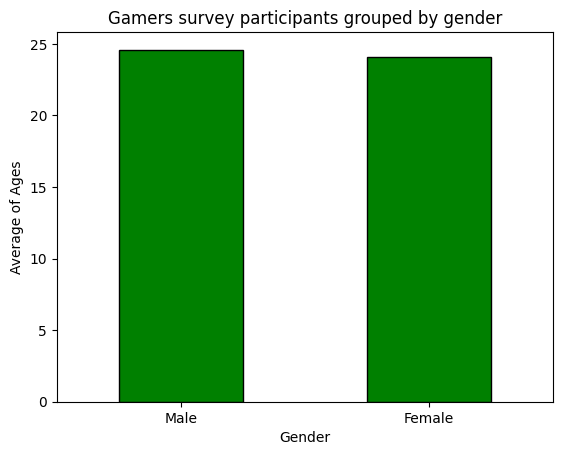

In [125]:
grouped_age2 = isolated_sorted_age.groupby('Gender')['Age'].mean()
New_sorted_data = grouped_age2.sort_values(ascending=False)

print(grouped_age2)

New_sorted_data.plot(kind='bar', color='green', edgecolor='black')
plt.title('Gamers survey participants grouped by gender')
plt.xlabel('Gender')
plt.ylabel('Average of Ages')
plt.xticks(rotation=0)
plt.show


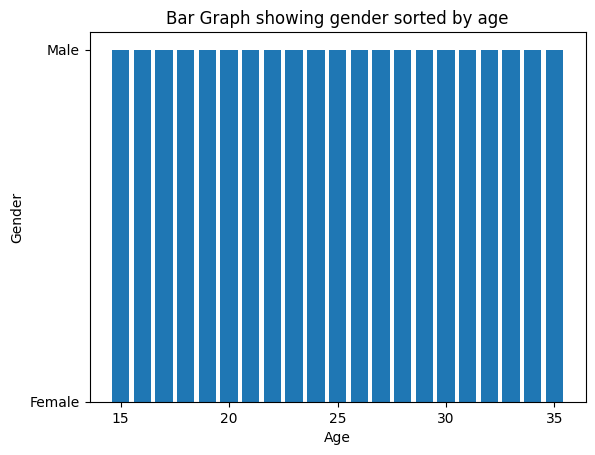

In [116]:
plt.bar(isolated_sorted_age['Age'], isolated_sorted_age['Gender'])
plt.xlabel('Age')
plt.ylabel('Gender')
plt.title('Bar Graph showing gender sorted by age')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

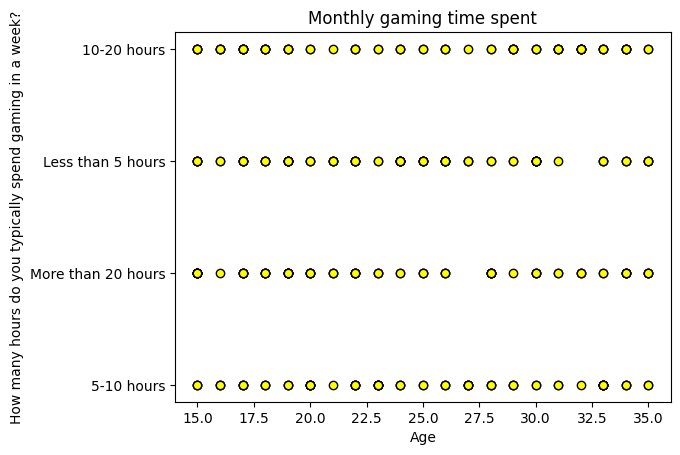

In [ ]:
plt.scatter(isolated_age,isolated_hours, color='yellow', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('How many hours do you typically spend gaming in a week?')
plt.title('Monthly gaming time spent')
plt.show

We find out how many survey participants we had and their ages. We used value counts to sort out how many of each grouping we had!

<Axes: title={'center': 'Gaming by Age'}, ylabel='Age'>

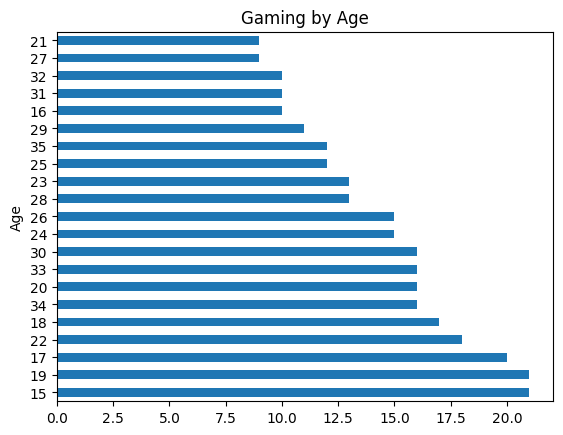

In [ ]:
sorted_survey['Age'].value_counts().plot.barh(title="Gaming by Age")



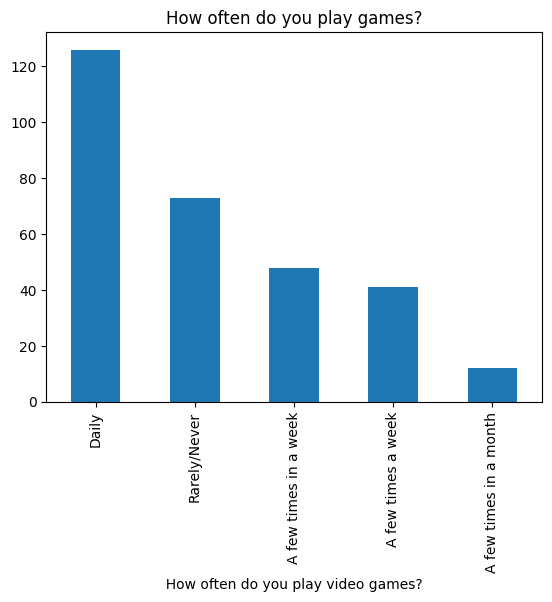

In [ ]:
sorted_survey['  How often do you play video games?  '].value_counts().plot.bar(title="How often do you play games?")
plt.show()